In [1]:
#找规律，相关度（heatmap）

#前期的数据检视 (column)

#找规律，相关度（heatmap）

In [2]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display




from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Load the file
song_data = pd.read_csv("song_data.csv")
df = pd.DataFrame(song_data)



In [4]:
df

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
18830      0.893000         0.500   0.151          0.000065   11    0.1110   
18831      0.765000         0.495   0.161          0.000001   11    0.1050   
18832      0.847000         0.719   0.325          0.000000    0    0.1250   
18833      0.945000         0.488   0.326          0.015700    3    0.1190   
18834      0.911000         0.640   0.381          0.000254    4    0.1040   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
1        -6.407           0       0.0498  105.256               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
4        -5.065           1       0.0313  172.011               4   
...         ...         ...          ...      ...             ...   
18830   -16.107           1       0.0348  113.969               4   
18831   -14.078           0       0.0301   94.286               4   
18832   -12.222           1       0.0355  130.534               4   
18833   -12.020           1       0.0328  106.063               4   
18834   -11.790           1       0.0302   91.490               4   

       audio_valence  
0              0.474  
1              0.370  
2              0.324  
3              0.198  
4              0.574  
...              ...  
18830          0.300  
18831          0.265  
18832          0.286  
18833          0.323  
18834          0.581  

[18835 rows x 15 columns]

In [5]:
# check the total number of the music pieces
num_rows = song_data.shape[0]
num_rows

18835

In [6]:
print(song_data.columns.tolist())

['song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


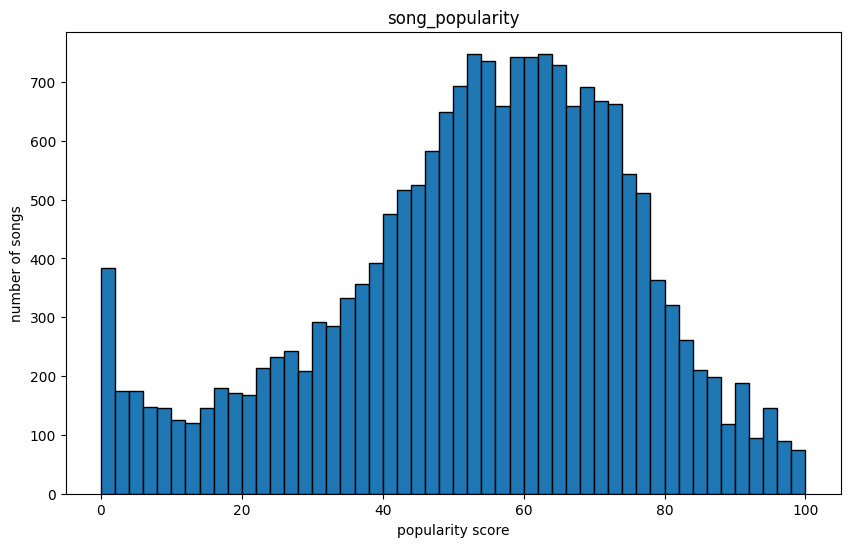

In [7]:
song_popularity_distribution = song_data["song_popularity"]
plt.hist(song_popularity_distribution, bins=50, edgecolor='black')
plt.title("song_popularity")
plt.xlabel("popularity score")
plt.ylabel("number of songs")
plt.show()

In [8]:
print(song_data.head())  # Inspect the first few rows
print(song_data.dtypes)  # Check the data types of each column

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

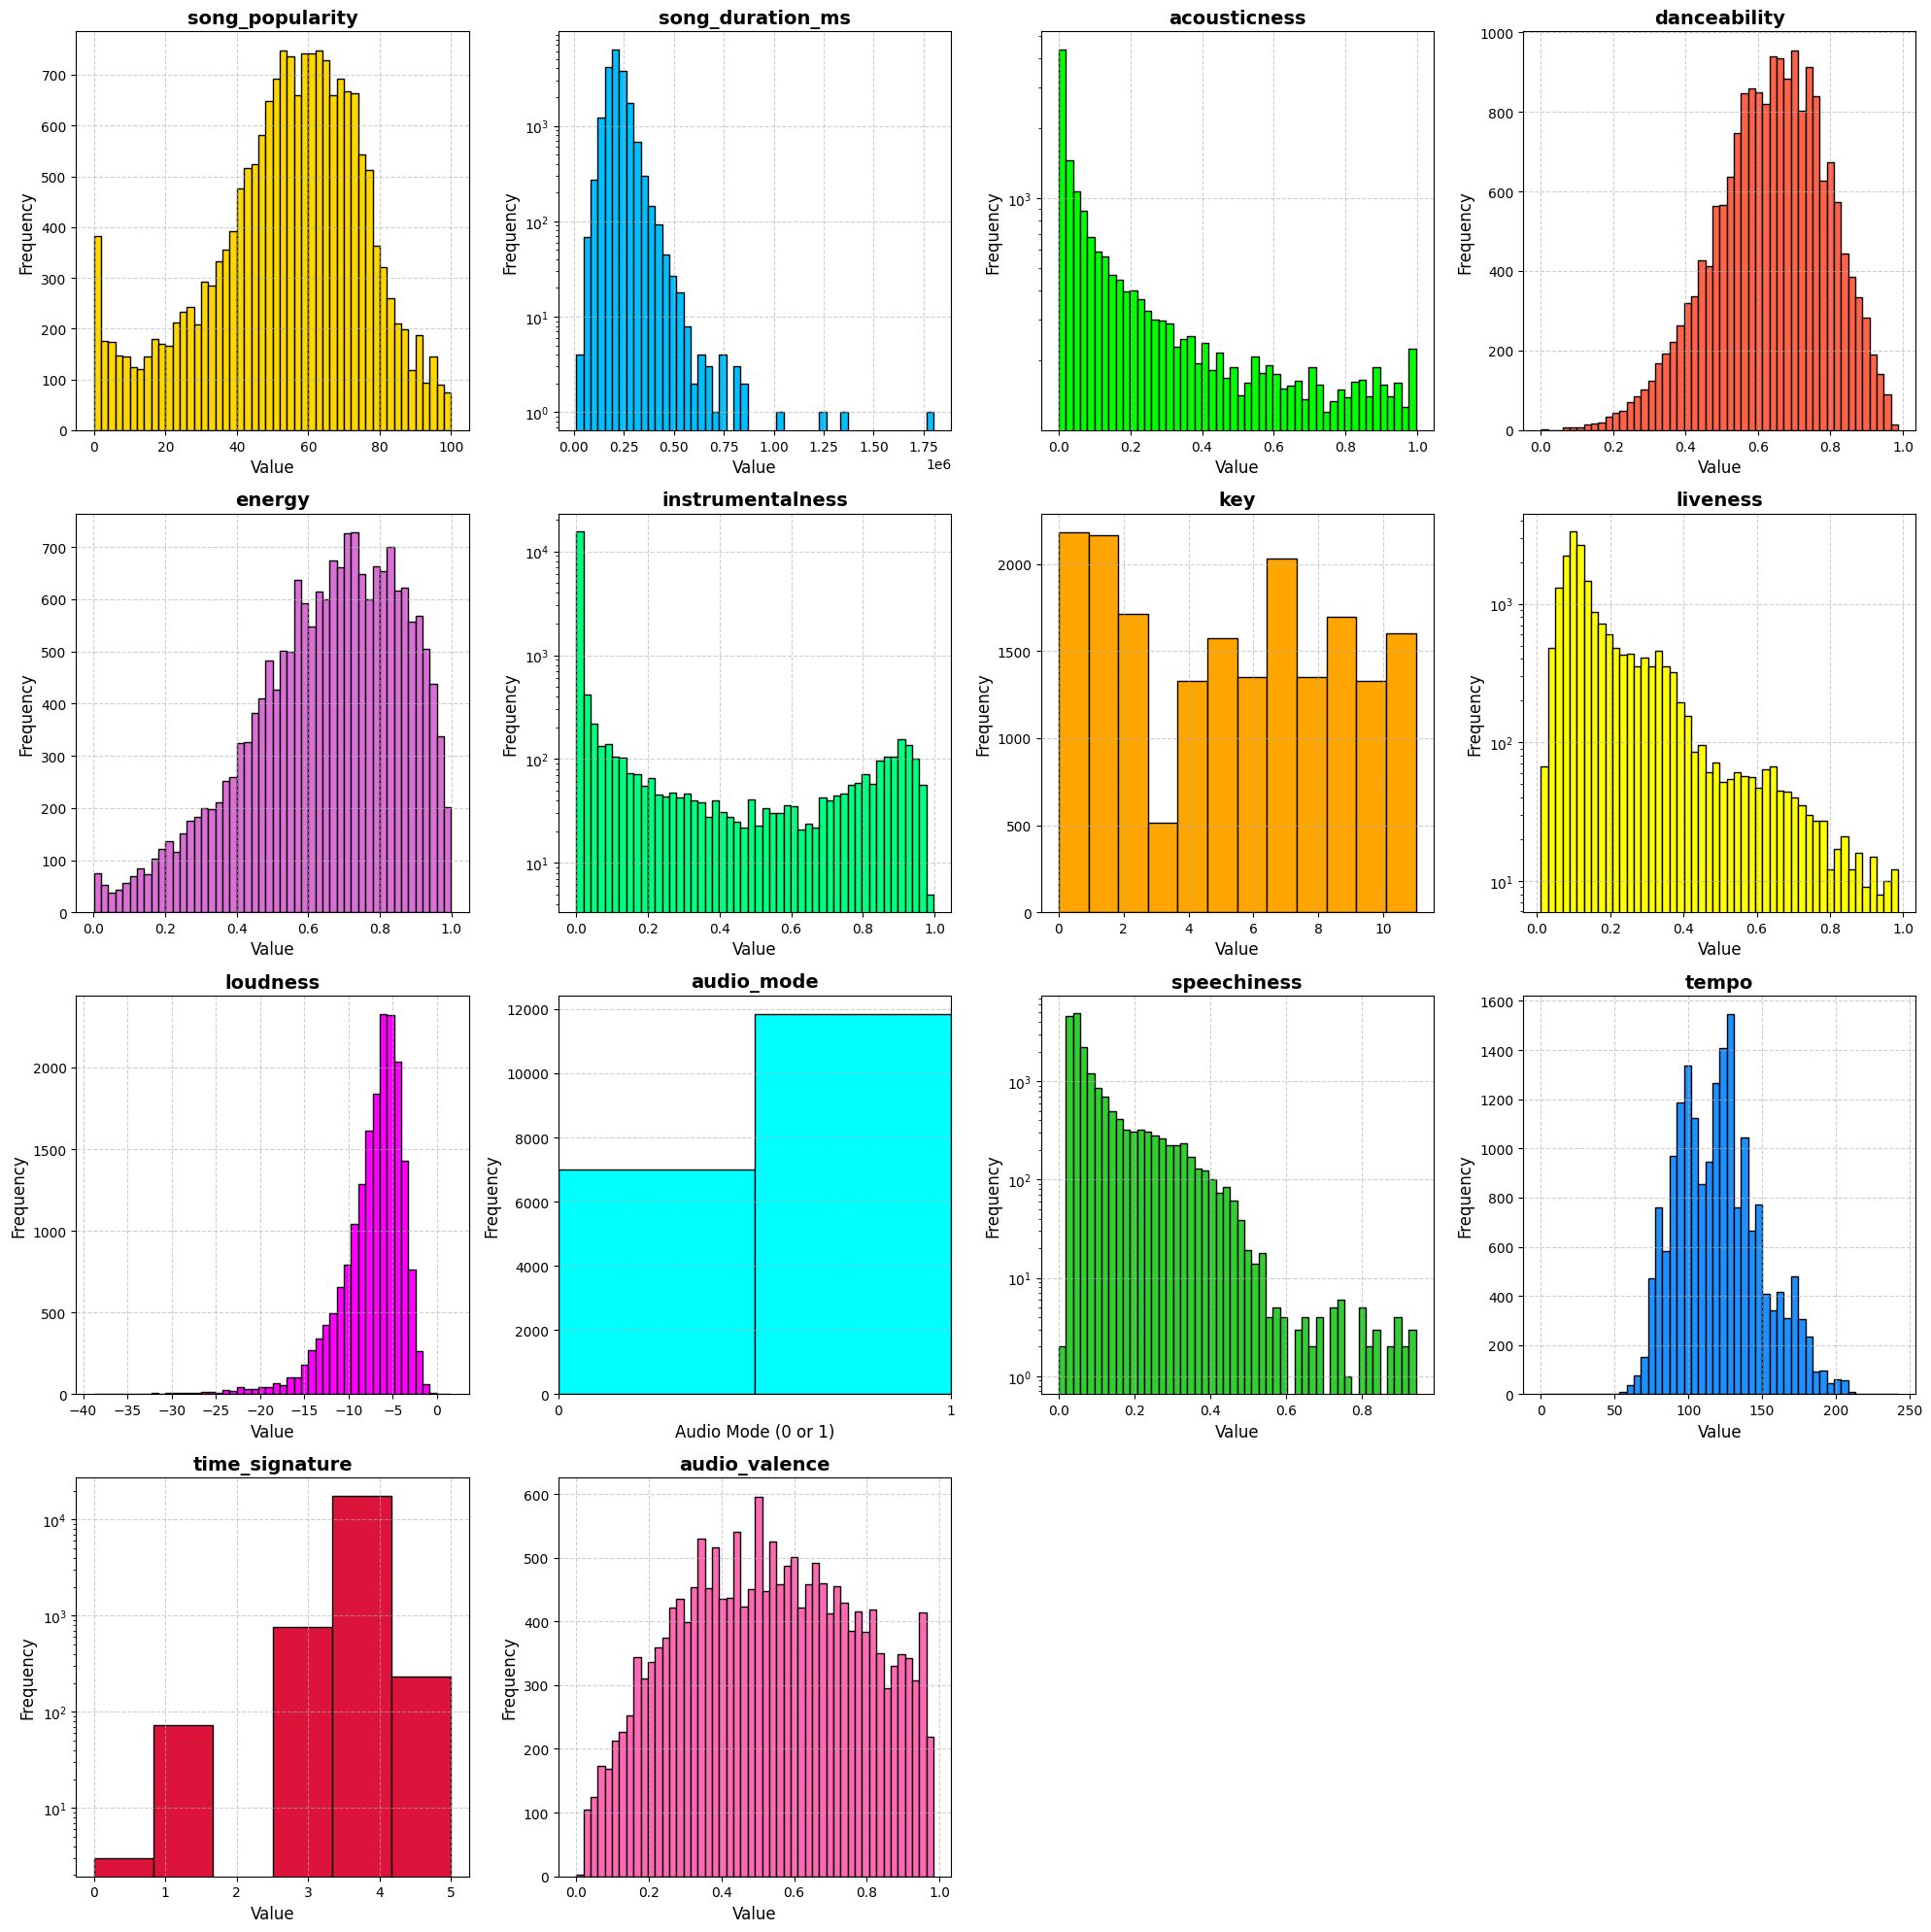

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Template for customizing a single plot
def customize_plot(ax, data, popularity, title, xlabel, ylabel, color, bins=50, bin_width=None, grid=True, annotate=False, log=True, xlim=None, ylim=None, right_ylabel="Popularity (Unit)"):
    # Compute histogram data
    counts, edges = np.histogram(data, bins=bins)
    
    # Compute bin_width if not specified
    if bin_width is None:
        bin_width = edges[1] - edges[0]
    
    # # Print the bin width
    # print(f"Bin width for '{title}': {bin_width}")
    
    # Use bin_width for plotting
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    ax.bar(bin_centers, counts, width=bin_width, color=color, edgecolor='black', log=log)
    
    # Set up the primary axis
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    if grid:
        ax.grid(True, linestyle='--', alpha=0.6)
    
    if annotate:
        ax.text(0.95, 0.95, f"n={len(data)}", transform=ax.transAxes,
                ha="right", va="top", fontsize=10,
                bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))
    
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    
    # # Retrieve and print the y-axis limits
    # y_limits = ax.get_ylim()
    # print(f"Y-axis limits for '{title}': {y_limits}")

# Main plotting logic
numeric_columns = song_data.select_dtypes(include=["number"]).columns
popularity = song_data["song_popularity"]  # Ensure popularity column exists

# Set up a grid for 14 plots (4x4 grid as an example)
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjust grid size and figure size as needed
axes = axes.flatten()  # Flatten to 1D for easy iteration

# Define specific settings for each plot
custom_settings = [
    {"color": "gold", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
    {"color": "deepskyblue", "bins": 50, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
    {"color": "lime", "bins": 50, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
    {"color": "tomato", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
    {"color": "orchid", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
    {"color": "springgreen", "bins": 50, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
    {"color": "orange", "bins": 12, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
    {"color": "yellow", "bins": 50, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
    {"color": "magenta", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
    {"color": "cyan", "bins": 2, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
    {"color": "limegreen", "bins": 50, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
    {"color": "dodgerblue", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
    {"color": "crimson", "bins": 6, "bin_width": None, "grid": True, "log": True, "xlim": None, "ylim": None},
    {"color": "hotpink", "bins": 50, "bin_width": None, "grid": True, "log": None, "xlim": None, "ylim": None},
    # Add more settings as needed for each column
]

# Loop through the numeric columns and plot
for i, column in enumerate(numeric_columns):
    if i >= len(custom_settings):  # Default settings if not enough customizations are provided
        custom_settings.append({"color": "gray", "bins": 50, "bin_width": None, "grid": True, "annotate": True, "log": False, "xlim": None, "ylim": None})
    
    settings = custom_settings[i]
    data = song_data[column].dropna()  # Drop NaN values before plotting
    pop_data = popularity.loc[data.index]  # Align popularity with valid data indices
    
    # Custom handling for 'audio mode' plot
    if column == "audio_mode":
        settings["bins"] = 2  # Only 0 and 1 values
        settings["xlim"] = (0, 1)
        settings["log"] = False  # Disable log scale for clarity
    
    customize_plot(
        ax=axes[i],
        data=data,
        popularity=pop_data,
        title=column,
        xlabel="Value" if column != "audio_mode" else "Audio Mode (0 or 1)",
        ylabel="Frequency",
        color=settings["color"],
        bins=settings["bins"],
        bin_width=settings["bin_width"],
        grid=settings["grid"],
        log=settings["log"],
        xlim=settings["xlim"],
        ylim=settings["ylim"],
        right_ylabel="Popularity (Mean)"  # Editable unit label for the right y-axis
    )
    
    # Further customization for 'audio mode' plot
    if column == "audio_mode":
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(["0", "1"])

# Hide unused subplots if there are fewer than 16 columns
for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


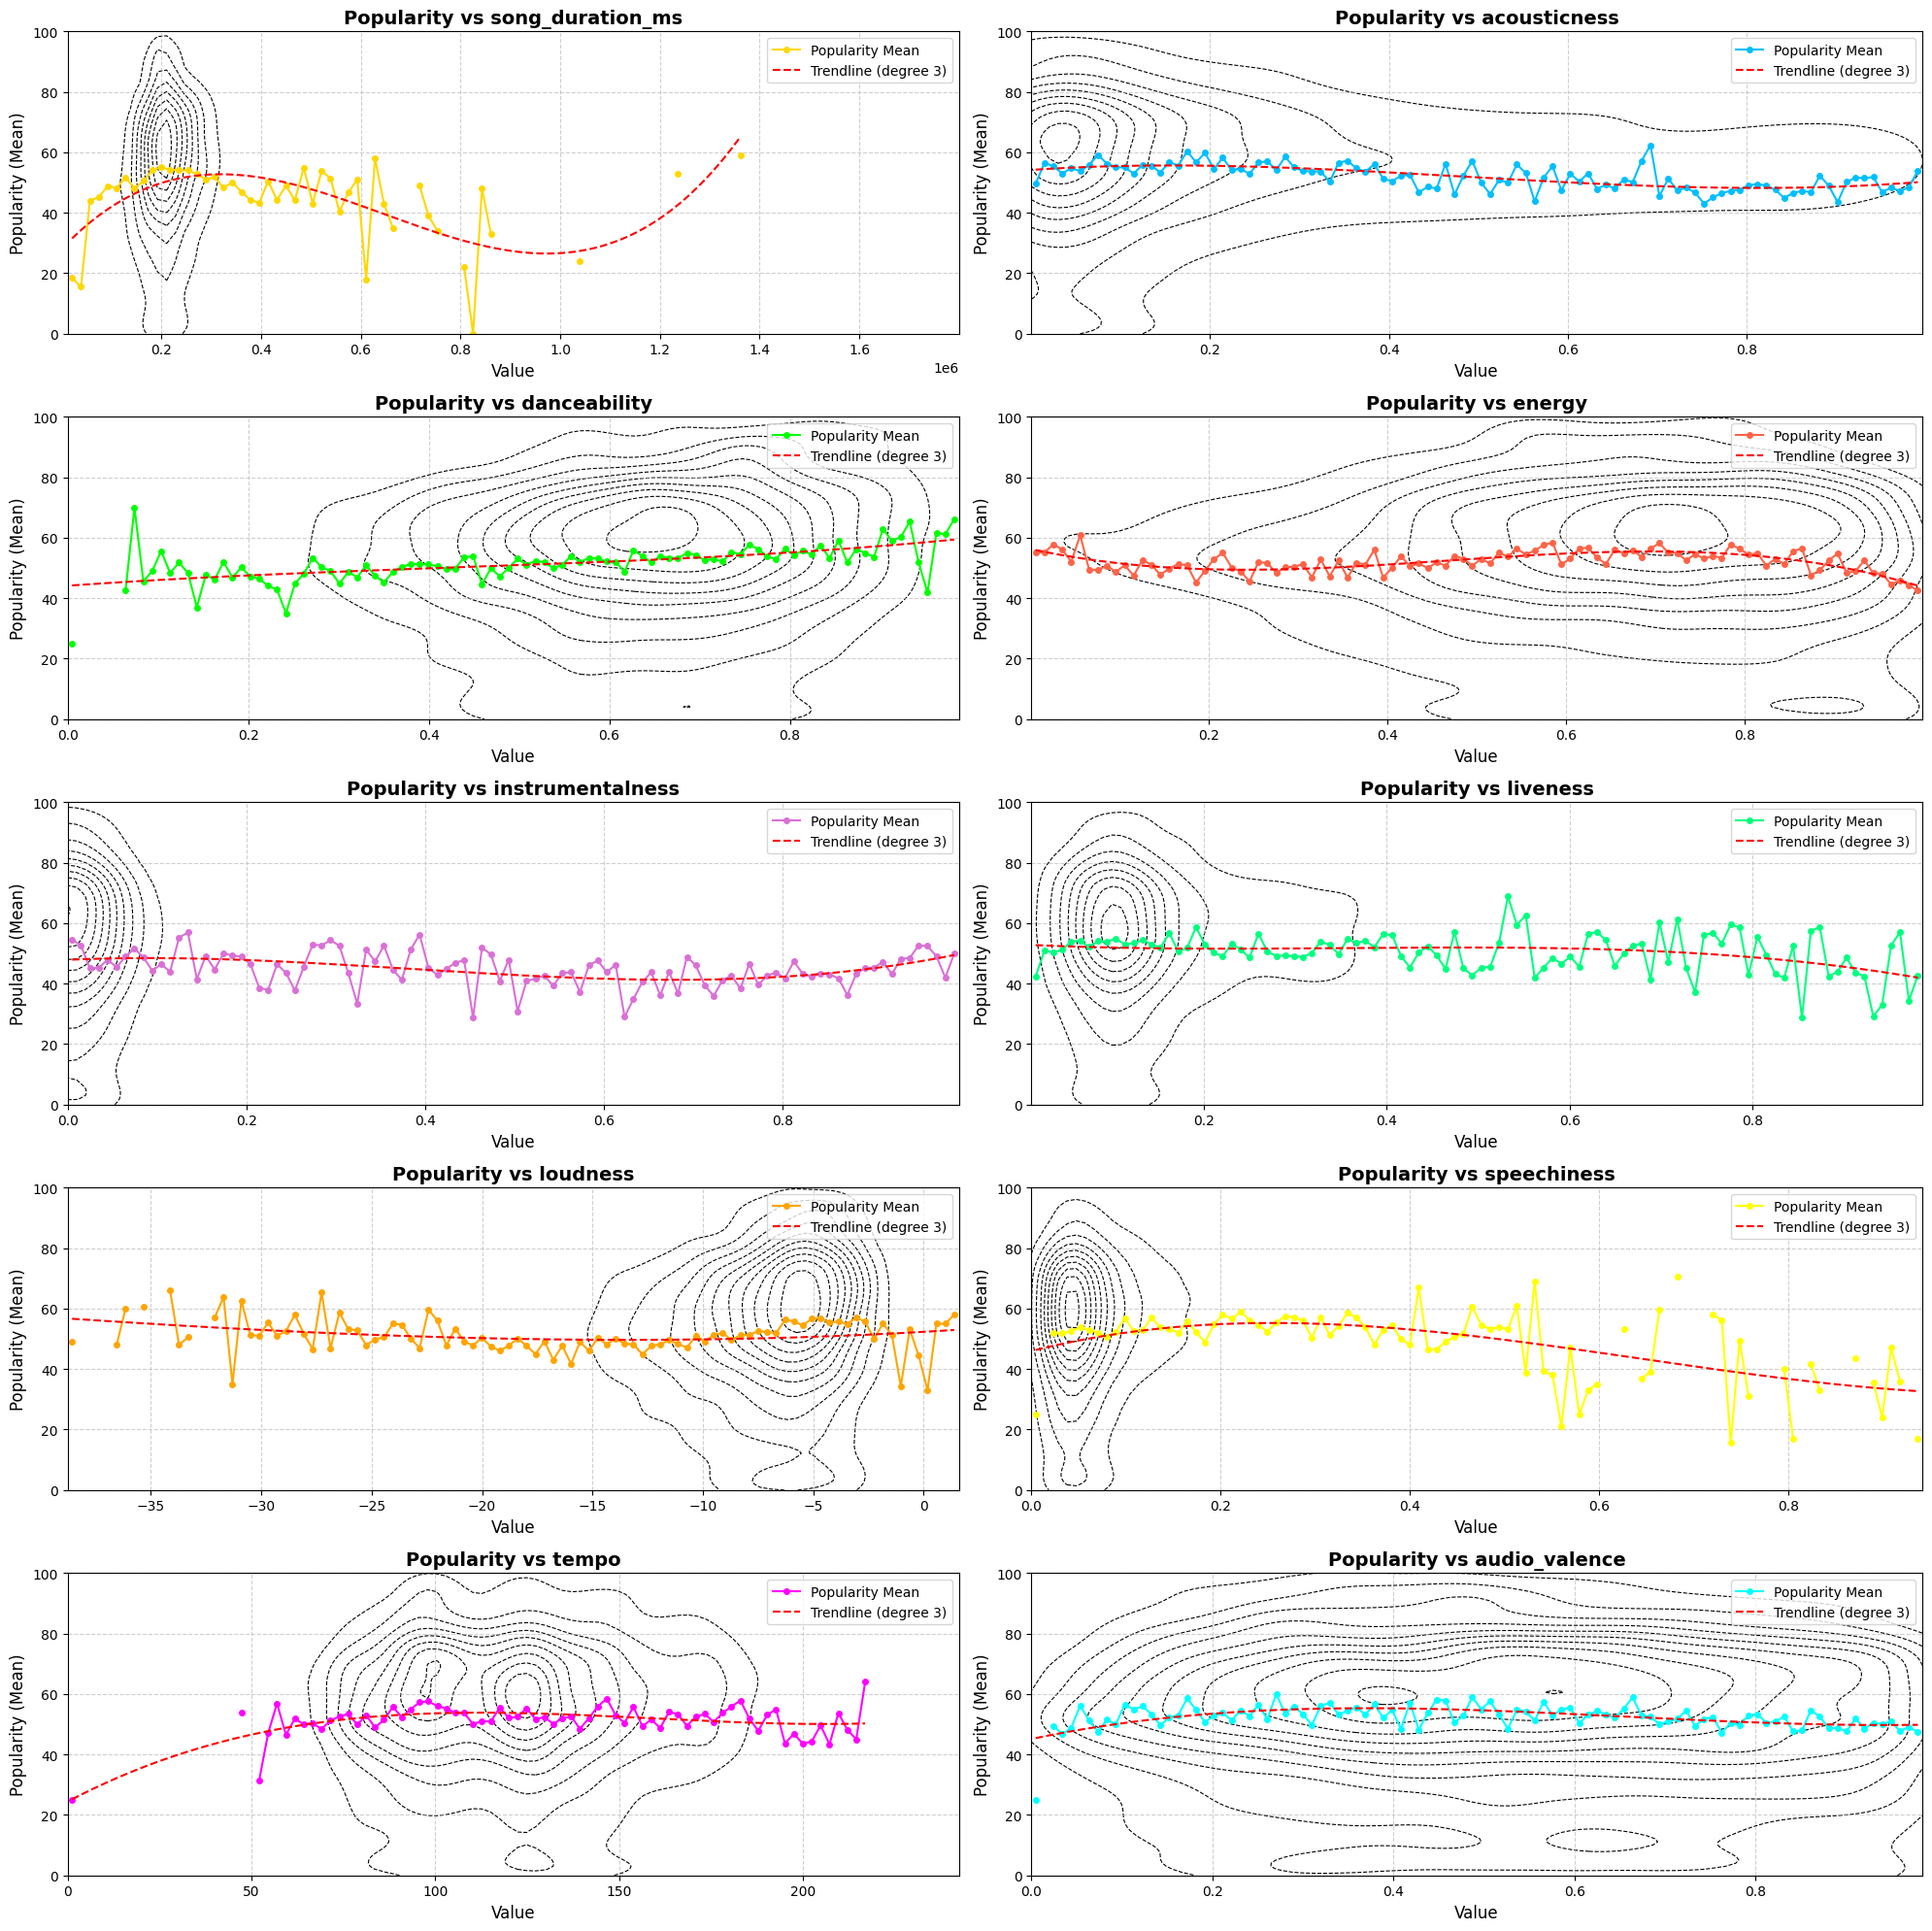

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Function to compute and plot popularity means with a trendline and contour map
def plot_popularity_means(ax, data, popularity, title, xlabel, ylabel, color, bins=100, grid=True, xlim=None, ylim=None):
    # Compute histogram data
    counts, edges = np.histogram(data, bins=bins)
    
    # Calculate bin centers
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    
    # Map data to bins
    bin_indices = np.digitize(data, edges) - 1
    popularity_means = [
        popularity[bin_indices == i].mean() if np.any(bin_indices == i) else np.nan
        for i in range(len(edges) - 1)
    ]
    
    # Remove NaNs for trendline and contour calculation
    valid_data = ~np.isnan(popularity_means)
    x = bin_centers[valid_data]
    y = np.array(popularity_means)[valid_data]
    
    # Generate a density map for contour plotting
    xy = np.vstack([data, popularity])
    kde = gaussian_kde(xy)
    density = kde(xy)
    
    # Create grid for contour
    x_grid = np.linspace(data.min(), data.max(), 100)
    y_grid = np.linspace(popularity.min(), popularity.max(), 100)
    X, Y = np.meshgrid(x_grid, y_grid)
    Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
    
    # Add contour lines (lower layer)
    ax.contour(X, Y, Z, levels=10, colors='black', linestyles='--', linewidths=0.8, zorder=1)
    
    # Plot popularity means (higher layer)
    ax.plot(bin_centers, popularity_means, marker='o', color=color, label="Popularity Mean", markersize=4, zorder=2)
    
    # Automatically determine the best polynomial degree for trendline
    if len(x) > 1:  # Ensure there are enough points
        best_degree = 1  # Start with linear
        best_r2 = -np.inf
        best_poly = None
        
        for degree in range(1, 4):  # Test linear, quadratic, cubic
            coefs = np.polyfit(x, y, deg=degree)
            poly = np.poly1d(coefs)
            y_fit = poly(x)
            
            # Compute R^2 (coefficient of determination)
            ss_total = np.sum((y - np.mean(y))**2)
            ss_residual = np.sum((y - y_fit)**2)
            r2 = 1 - (ss_residual / ss_total)
            
            if r2 > best_r2:  # Select the degree with the highest R^2
                best_r2 = r2
                best_degree = degree
                best_poly = poly
        
        # Generate smooth points for the best polynomial trendline
        x_smooth = np.linspace(x.min(), x.max(), 500)
        y_smooth = best_poly(x_smooth)
        
        # Plot the best polynomial trendline (higher layer)
        ax.plot(x_smooth, y_smooth, color='red', linestyle='--', label=f"Trendline (degree {best_degree})", zorder=3)
    
    # Set up the axis
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    if grid:
        ax.grid(True, linestyle='--', alpha=0.6)
    
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    
    # Add legend for clarity
    ax.legend(loc='upper right')
    # Main plotting logic for popularity means
numeric_columns = song_data.select_dtypes(include=["number"]).columns
popularity = song_data["song_popularity"]  # Ensure popularity column exists

# Set up the grid for the plots
fig, axes = plt.subplots(5, 2, figsize=(20, 20))  # Adjust grid size as needed
axes = axes.flatten()  # Flatten to 1D for easy iteration

# Define specific settings for each popularity plot
popularity_plot_settings = [
    {"color": "gold", "bins": 100,  "grid": True,  "xlim": None, "ylim": None},
    {"color": "deepskyblue", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "lime", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "tomato", "bins": 100,"grid": True,  "xlim": None, "ylim": None},
    {"color": "orchid", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "springgreen", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "orange", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "yellow", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "magenta", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "cyan", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "limegreen", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    # Add more settings as needed
]

# Initialize a counter for the next available subplot position
current_position = 0

# Loop through the numeric columns to plot popularity means
for i, column in enumerate(numeric_columns):
    # Skip plots for indices 7, 10, 13 (adjusting for 0-based indexing)
    if i in [0, 6, 9, 12]:
        continue
    
    if current_position >= len(popularity_plot_settings):  # Default settings if not enough customizations are provided
        popularity_plot_settings.append({"color": "gray", "bins": 50, "grid": True, "xlim": None, "ylim": None})
    
    settings = popularity_plot_settings[current_position]
    data = song_data[column].dropna()  # Drop NaN values
    pop_data = popularity.loc[data.index]  # Align popularity with valid data indices
    
    plot_popularity_means(
        ax=axes[current_position],
        data=data,
        popularity=pop_data,
        title=f"Popularity vs {column}",
        xlabel="Value",
        ylabel="Popularity (Mean)",
        color=settings["color"],
        bins=settings["bins"],
        grid=settings["grid"],
        xlim=settings["xlim"],
        ylim=settings["ylim"]
    )
    
    current_position += 1  # Move to the next position

# Hide any remaining unused subplots
for j in range(current_position, len(axes)):
    axes[j].remove()  # Remove unused axes completely

# Adjust layout
plt.tight_layout()
plt.show()

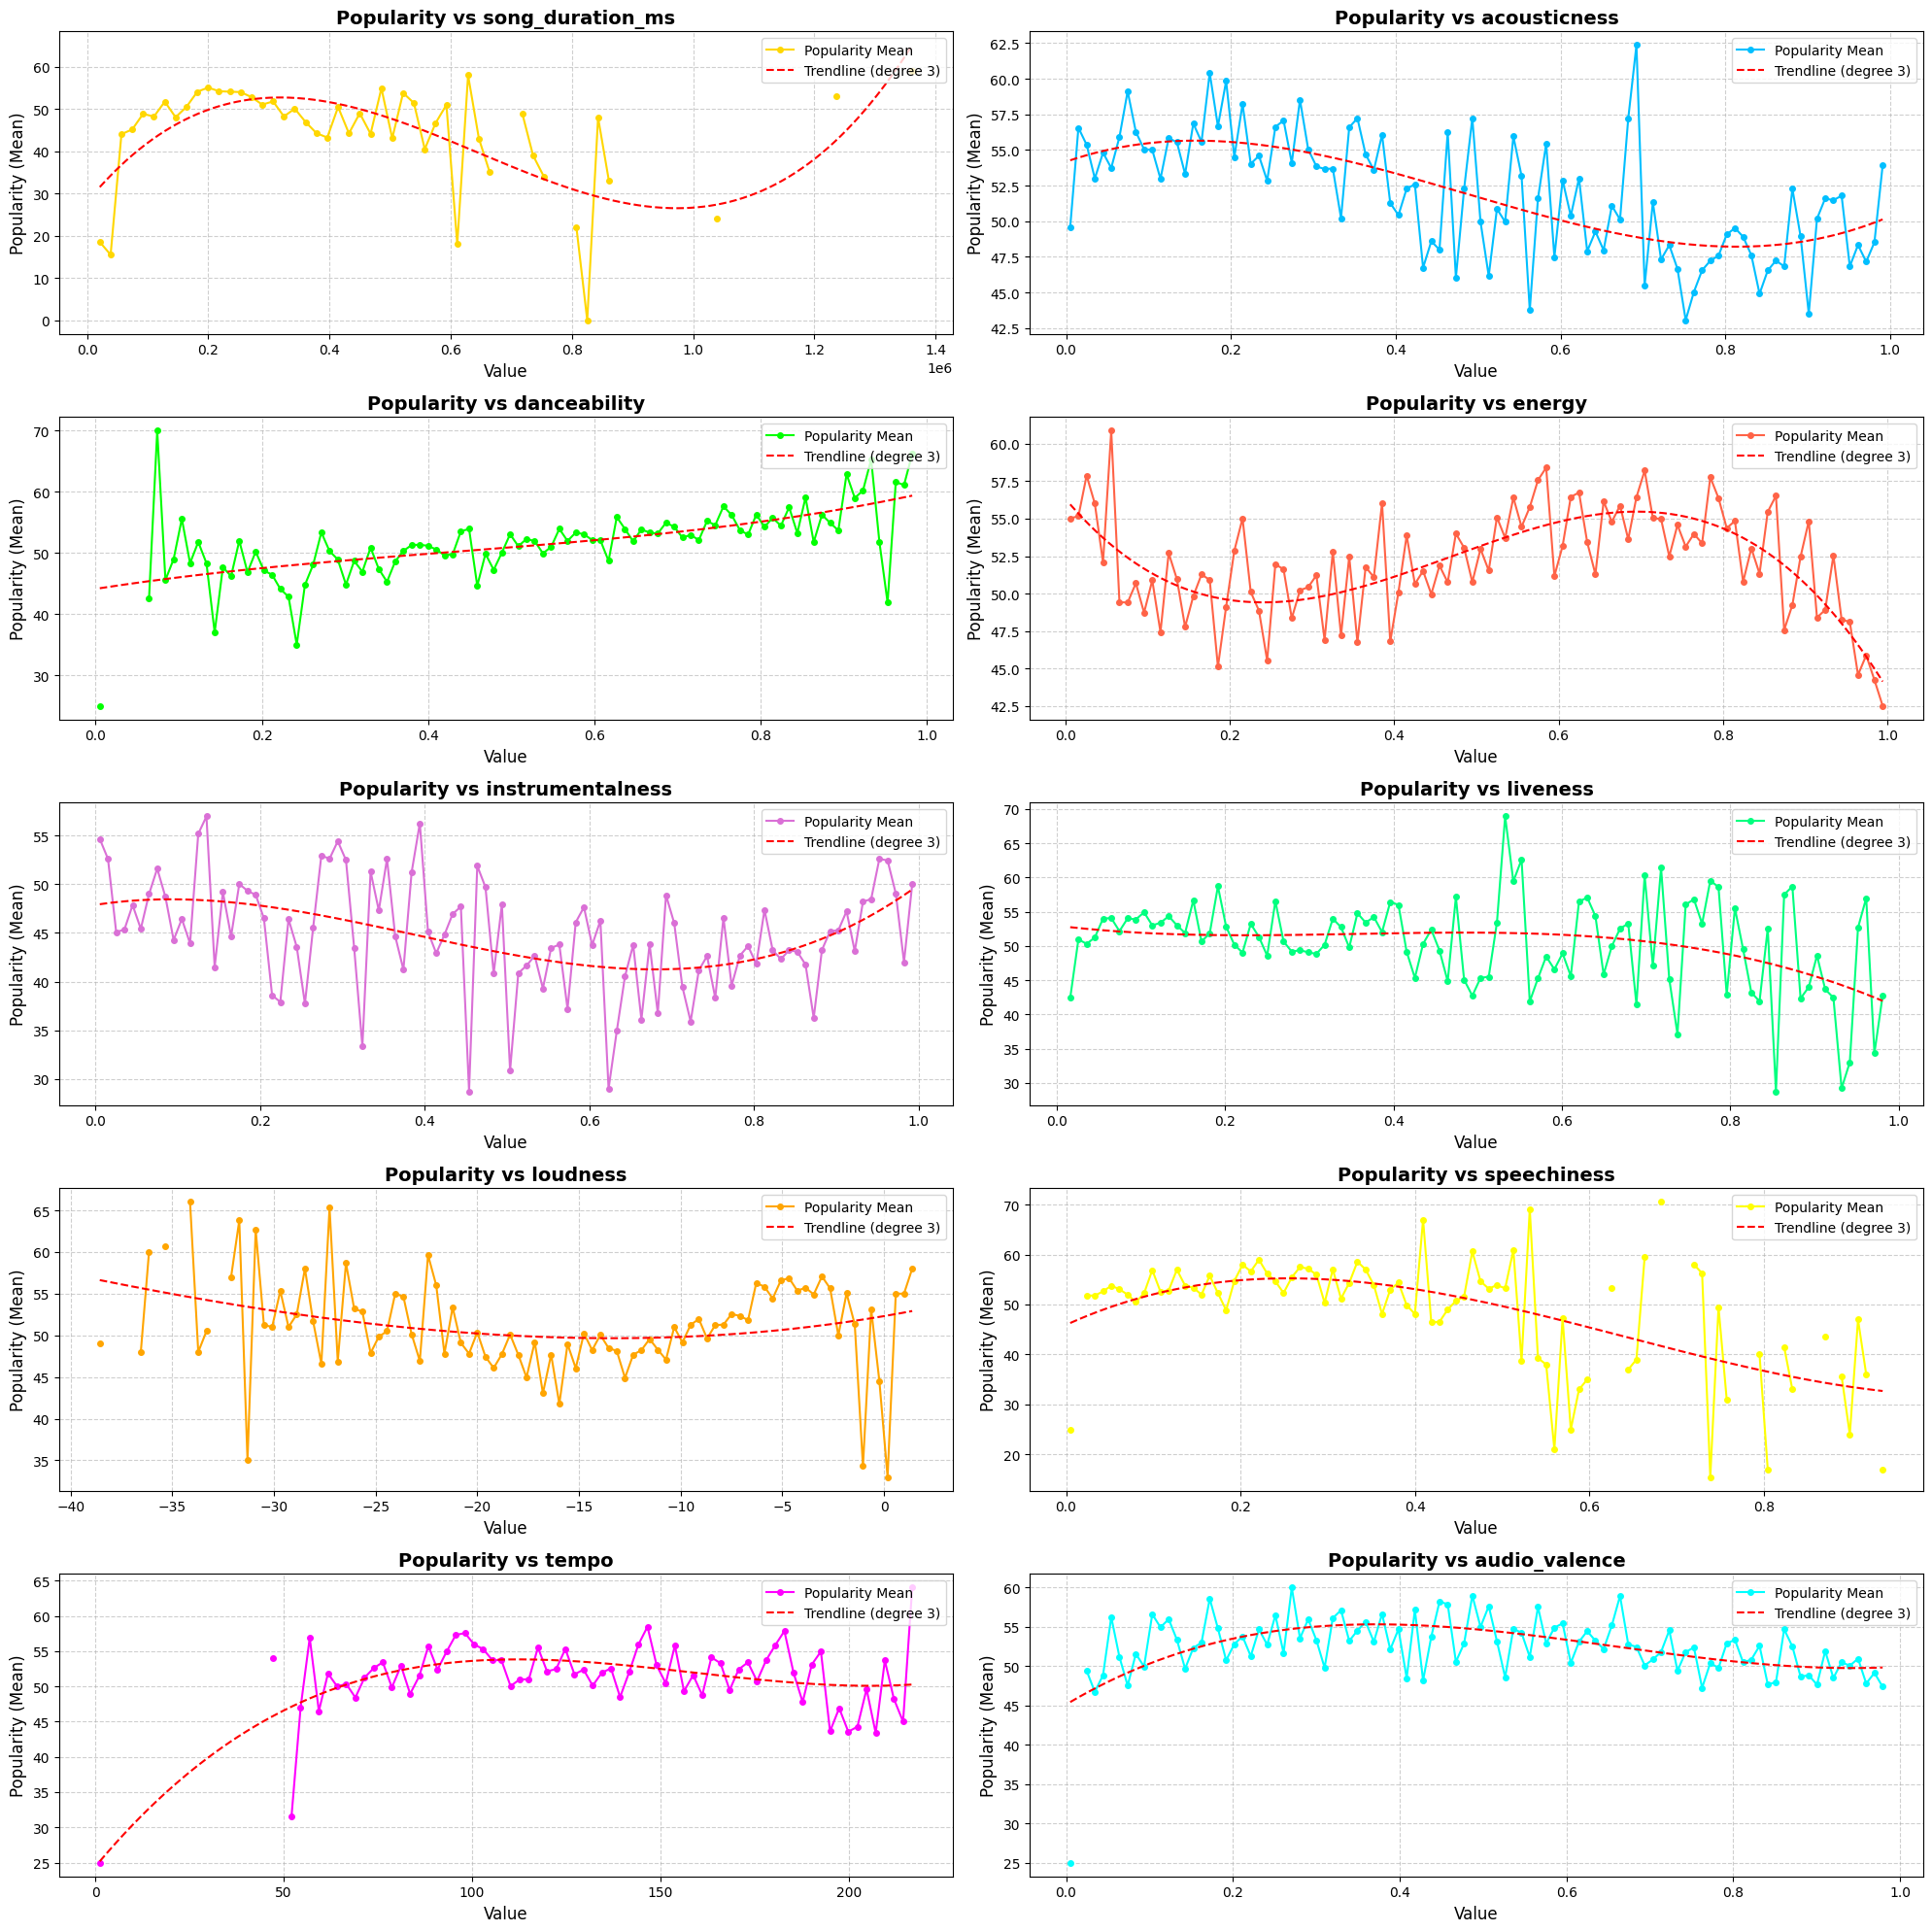

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress

import numpy as np
from numpy.polynomial.polynomial import Polynomial

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Function to compute and plot popularity means with a trendline and contour map
def plot_popularity_means(ax, data, popularity, title, xlabel, ylabel, color, bins=100, grid=True, xlim=None, ylim=None):
    # Compute histogram data
    counts, edges = np.histogram(data, bins=bins)
    
    # Calculate bin centers
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    
    # Map data to bins
    bin_indices = np.digitize(data, edges) - 1
    popularity_means = [
        popularity[bin_indices == i].mean() if np.any(bin_indices == i) else np.nan
        for i in range(len(edges) - 1)
    ]
    
    # Remove NaNs for trendline and contour calculation
    valid_data = ~np.isnan(popularity_means)
    x = bin_centers[valid_data]
    y = np.array(popularity_means)[valid_data]
    
    # Plot popularity means
    ax.plot(bin_centers, popularity_means, marker='o', color=color, label="Popularity Mean", markersize=4)
    
    # Automatically determine the best polynomial degree for trendline
    if len(x) > 1:  # Ensure there are enough points
        best_degree = 1  # Start with linear
        best_r2 = -np.inf
        best_poly = None
        
        for degree in range(1, 4):  # Test linear, quadratic, cubic
            coefs = np.polyfit(x, y, deg=degree)
            poly = np.poly1d(coefs)
            y_fit = poly(x)
            
            # Compute R^2 (coefficient of determination)
            ss_total = np.sum((y - np.mean(y))**2)
            ss_residual = np.sum((y - y_fit)**2)
            r2 = 1 - (ss_residual / ss_total)
            
            if r2 > best_r2:  # Select the degree with the highest R^2
                best_r2 = r2
                best_degree = degree
                best_poly = poly
        
        # Generate smooth points for the best polynomial trendline
        x_smooth = np.linspace(x.min(), x.max(), 500)
        y_smooth = best_poly(x_smooth)
        
        # Plot the best polynomial trendline
        ax.plot(x_smooth, y_smooth, color='red', linestyle='--', label=f"Trendline (degree {best_degree})", zorder=3)
    
    # Set up the axis
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    if grid:
        ax.grid(True, linestyle='--', alpha=0.6)
    
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    
    # Add legend for clarity
    ax.legend(loc='upper right')

    
# Main plotting logic for popularity means
numeric_columns = song_data.select_dtypes(include=["number"]).columns
popularity = song_data["song_popularity"]  # Ensure popularity column exists

# Set up the grid for the plots
fig, axes = plt.subplots(5, 2, figsize=(20, 20))  # Adjust grid size as needed
axes = axes.flatten()  # Flatten to 1D for easy iteration

# Define specific settings for each popularity plot
popularity_plot_settings = [
    {"color": "gold", "bins": 100,  "grid": True,  "xlim": None, "ylim": None},
    {"color": "deepskyblue", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "lime", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "tomato", "bins": 100,"grid": True,  "xlim": None, "ylim": None},
    {"color": "orchid", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "springgreen", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "orange", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "yellow", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "magenta", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "cyan", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    {"color": "limegreen", "bins": 100, "grid": True,  "xlim": None, "ylim": None},
    # Add more settings as needed
]

# Initialize a counter for the next available subplot position
current_position = 0

# Loop through the numeric columns to plot popularity means
for i, column in enumerate(numeric_columns):
    # Skip plots for indices 7, 10, 13 (adjusting for 0-based indexing)
    if i in [0, 6, 9, 12]:
        continue
    
    if current_position >= len(popularity_plot_settings):  # Default settings if not enough customizations are provided
        popularity_plot_settings.append({"color": "gray", "bins": 50, "grid": True, "xlim": None, "ylim": None})
    
    settings = popularity_plot_settings[current_position]
    data = song_data[column].dropna()  # Drop NaN values
    pop_data = popularity.loc[data.index]  # Align popularity with valid data indices
    
    plot_popularity_means(
        ax=axes[current_position],
        data=data,
        popularity=pop_data,
        title=f"Popularity vs {column}",
        xlabel="Value",
        ylabel="Popularity (Mean)",
        color=settings["color"],
        bins=settings["bins"],
        grid=settings["grid"],
        xlim=settings["xlim"],
        ylim=settings["ylim"]
    )
    
    current_position += 1  # Move to the next position

# Hide any remaining unused subplots
for j in range(current_position, len(axes)):
    axes[j].remove()  # Remove unused axes completely

# Adjust layout
plt.tight_layout()
plt.show()

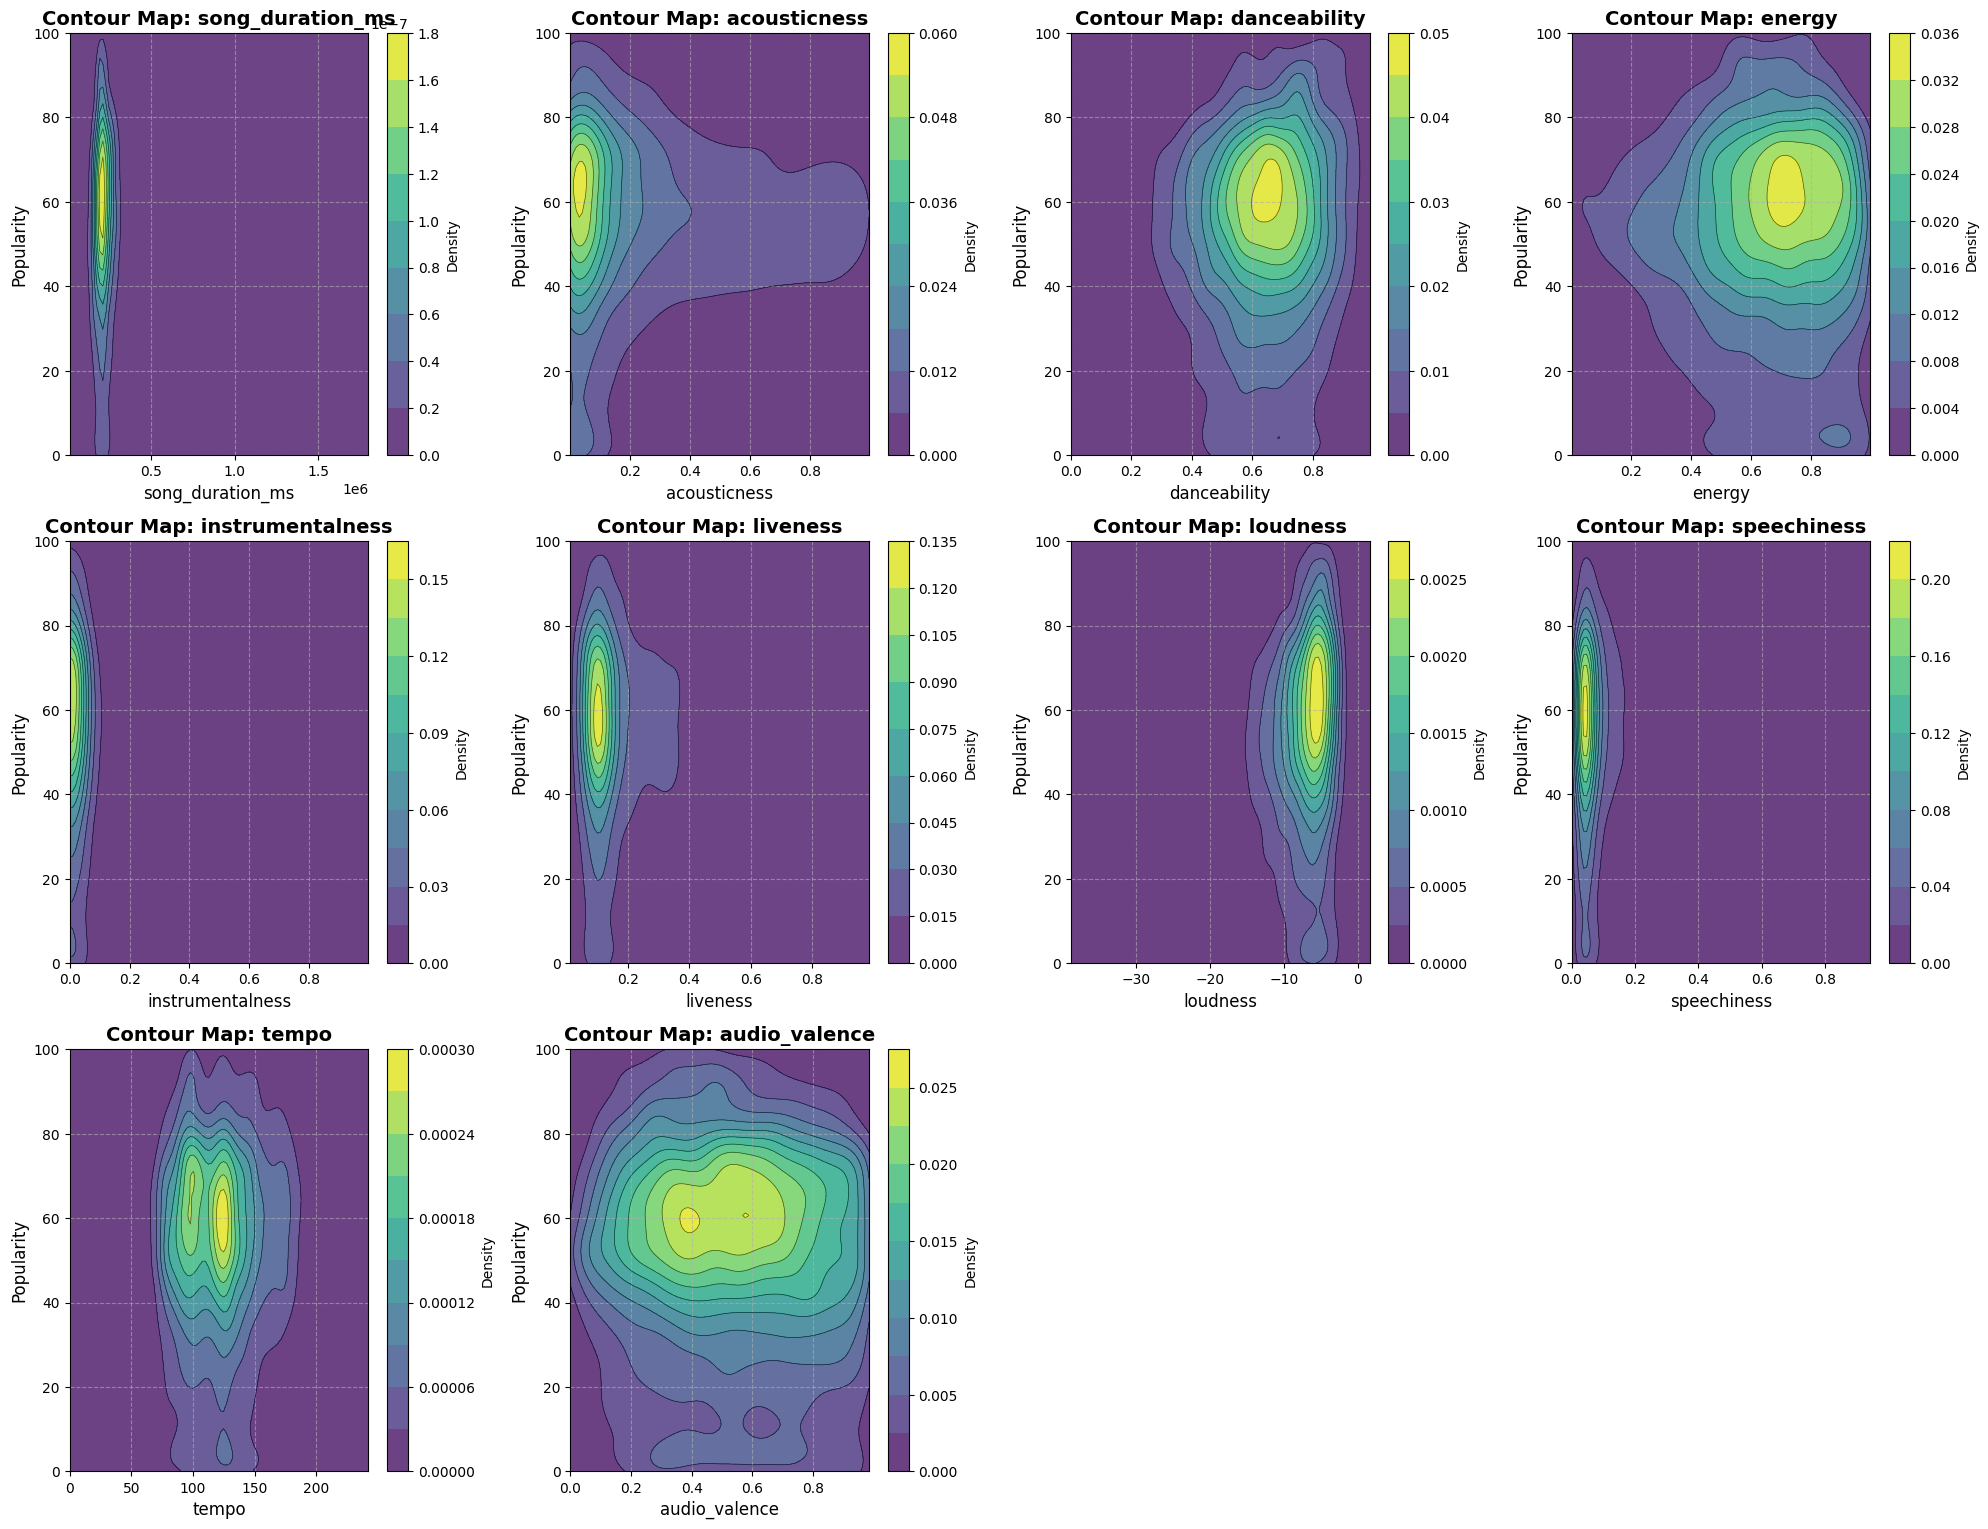

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def plot_contour_map(ax, data, popularity, title, xlabel, ylabel, bins=100, cmap='viridis'):
    """
    Plot a contour map to show the density distribution of data and popularity.
    """
    if len(data) > 1:  # Ensure enough data points for density estimation
        xy = np.vstack([data, popularity])
        
        # Add jitter to avoid singular matrix issues
        jitter = 1e-6 * np.random.randn(*xy.shape)
        xi, yi = np.linspace(data.min(), data.max(), bins), np.linspace(popularity.min(), popularity.max(), bins)
        xi, yi = np.meshgrid(xi, yi)
        
        # Compute density
        density = gaussian_kde(xy + jitter)(np.vstack([xi.ravel(), yi.ravel()])).reshape(xi.shape)
        
        # Plot contour map
        contour = ax.contourf(xi, yi, density, levels=10, cmap=cmap, alpha=0.8)
        ax.contour(xi, yi, density, levels=10, linewidths=0.5, colors='black', alpha=0.6)
        
        # Add color bar
        cbar = plt.colorbar(contour, ax=ax, orientation='vertical')
        cbar.set_label('Density')
    
    # Set axis labels and title
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

# Main plotting logic for contour maps
numeric_columns = song_data.select_dtypes(include=["number"]).columns
popularity = song_data["song_popularity"]  # Ensure popularity column exists

# Set up the grid for contour plots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjust grid size as needed
axes = axes.flatten()  # Flatten to 1D for easy iteration

# Initialize a counter for the next available subplot position
current_position = 0

# Loop through the numeric columns to plot contour maps
for i, column in enumerate(numeric_columns):
    # Skip plots for indices 7, 10, 13 (adjusting for 0-based indexing)
    if i in [0,6, 9, 12]:
        continue
    
    data = song_data[column].dropna()  # Drop NaN values
    pop_data = popularity.loc[data.index]  # Align popularity with valid data indices
    
    # Plot contour map
    plot_contour_map(
        ax=axes[current_position],
        data=data,
        popularity=pop_data,
        title=f"Contour Map: {column}",
        xlabel=column,
        ylabel="Popularity",
        bins=100,
        cmap='viridis'
    )
    
    current_position += 1  # Move to the next position

# Hide any remaining unused subplots
for j in range(current_position, len(axes)):
    axes[j].remove()  # Remove unused axes completely

# Adjust layout
plt.tight_layout()
plt.show()

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

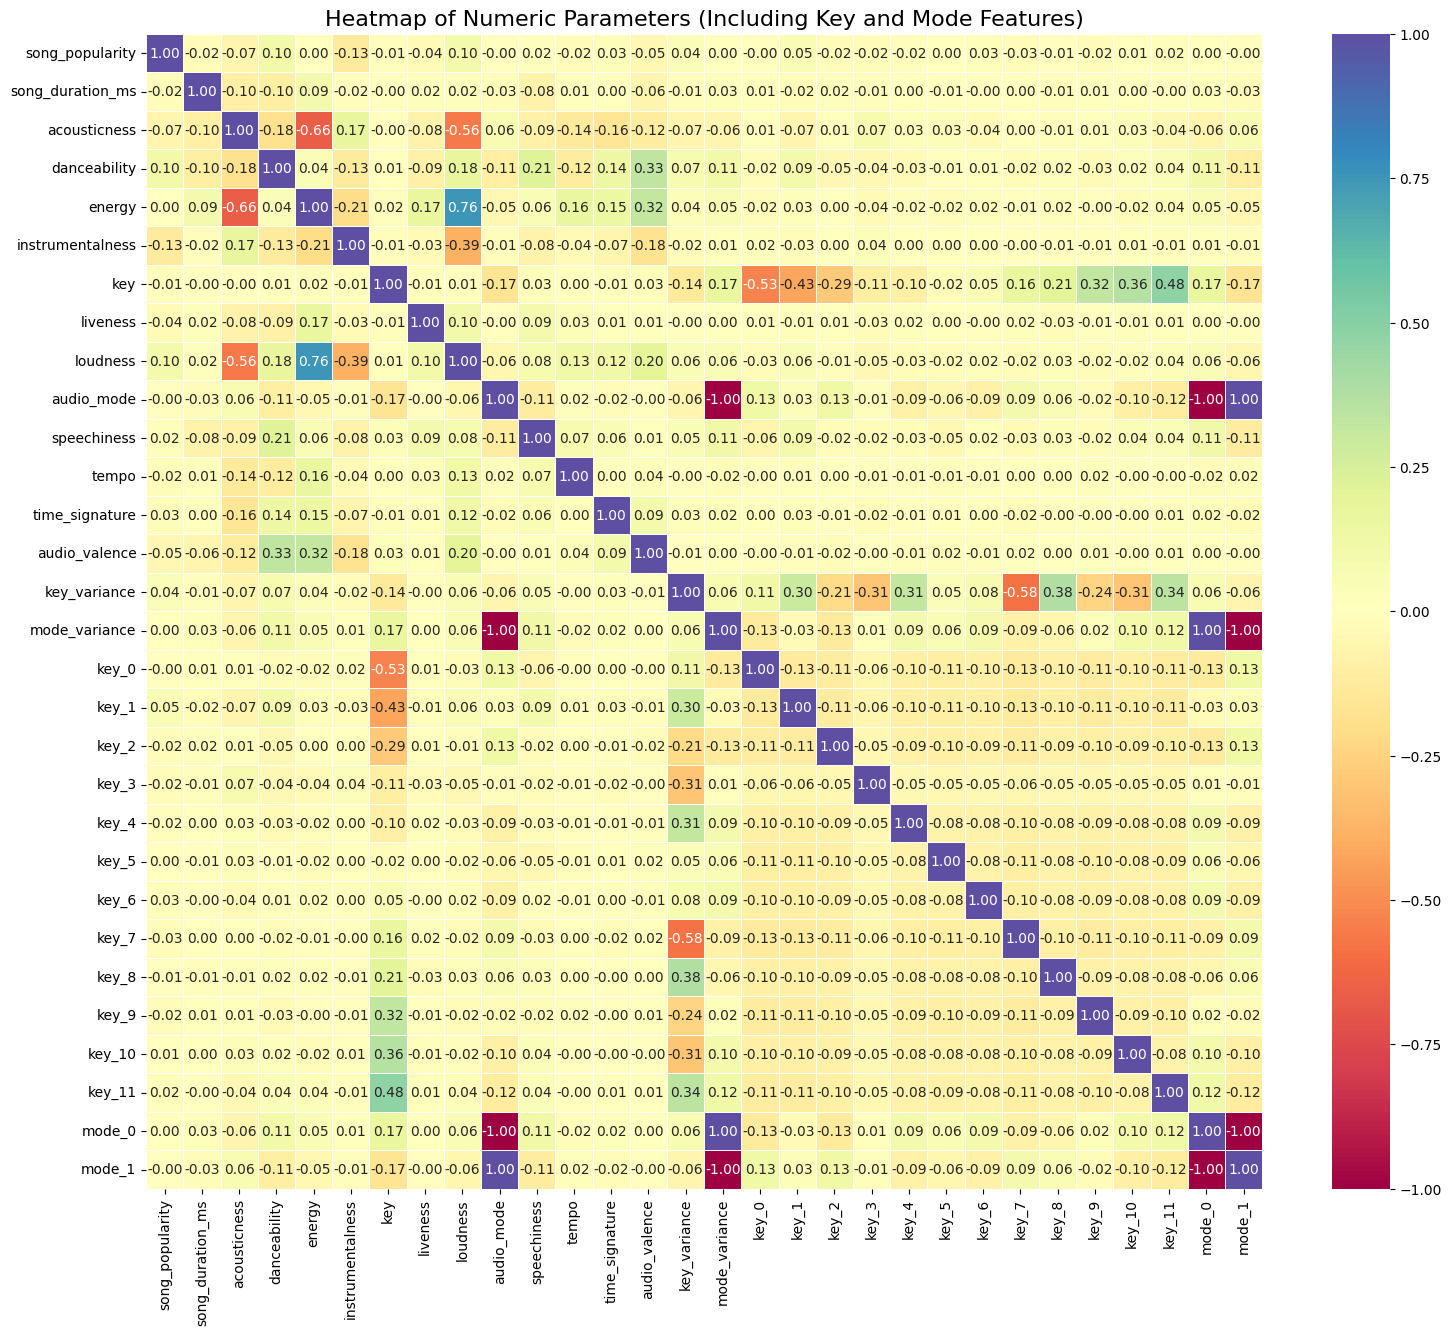

In [ ]:
# # Select numeric columns for heatmap
# numeric_data = song_data.select_dtypes(include=["number"])

# # Compute the correlation matrix
# correlation_matrix = numeric_data.corr()

# # Create a heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Heatmap of Numeric Parameters", fontsize=16)
# plt.show()
#add key and mode
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# One-hot encode `key` and `audio_mode`
keys_encoded = pd.get_dummies(song_data['key'], prefix='key')
modes_encoded = pd.get_dummies(song_data['audio_mode'], prefix='mode')

# Combine original numeric data with the encoded features
numeric_data = pd.concat([song_data.select_dtypes(include=["number"]), keys_encoded, modes_encoded], axis=1)

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numeric Parameters (Including Key and Mode Features)", fontsize=16)
plt.show()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    song_data['energy'], song_data['acousticness'],
    c=song_data['audio_valence'], cmap='viridis', alpha=0.8, edgecolors='k'  # Set smaller marker size using 's'
)
plt.colorbar(scatter, label='audio_valence')
plt.title('energy vs acousticness (Colored by audio_valence)', fontsize=16)
plt.xlabel('energy', fontsize=14)
plt.ylabel('acousticness', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

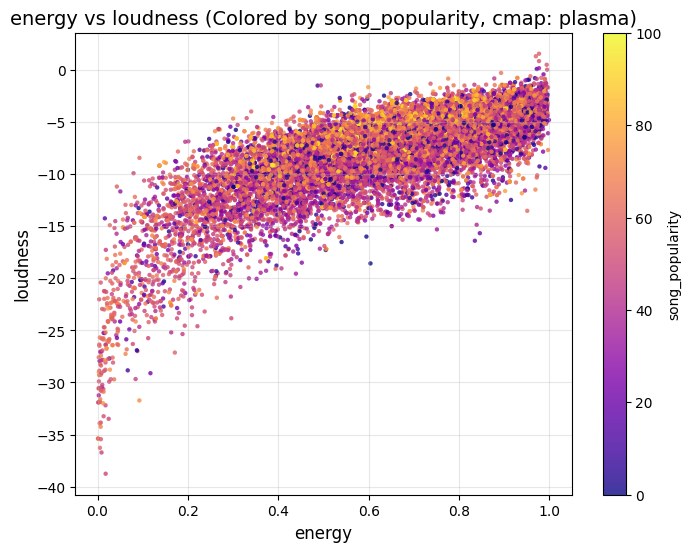

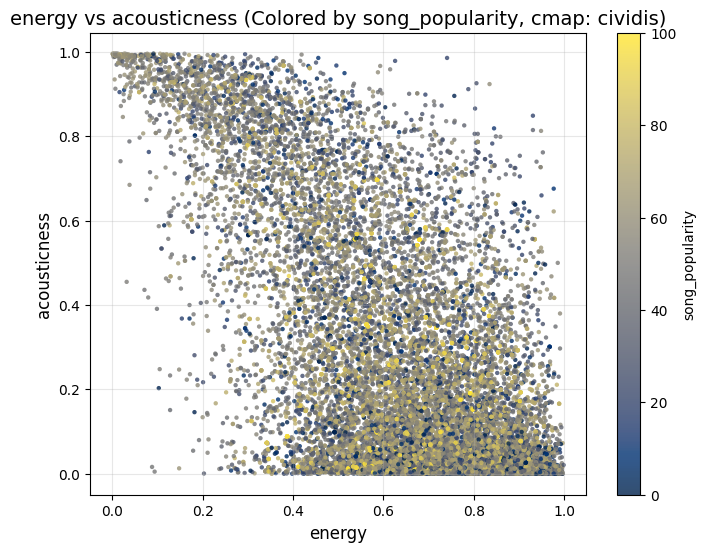

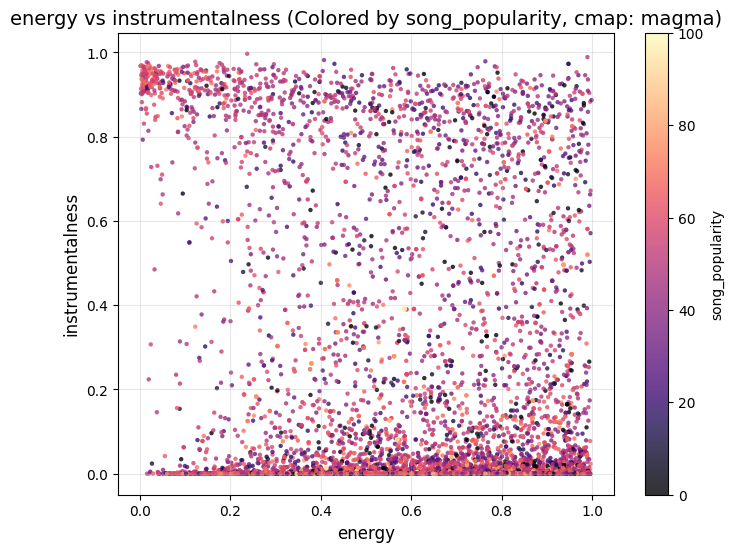

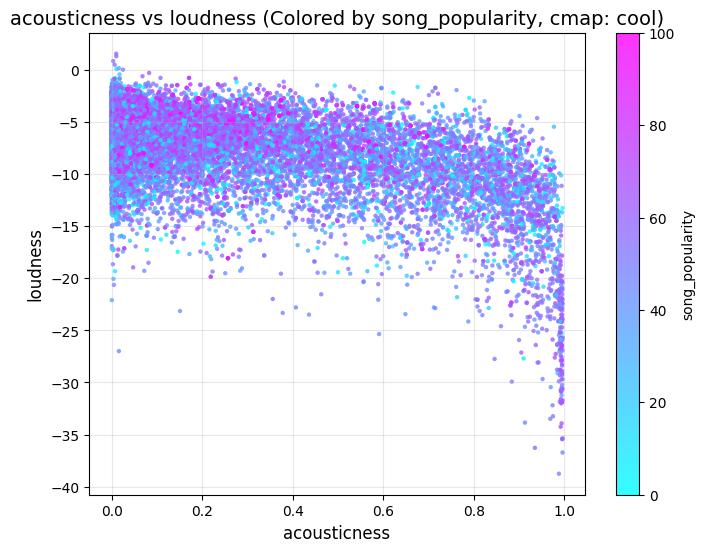

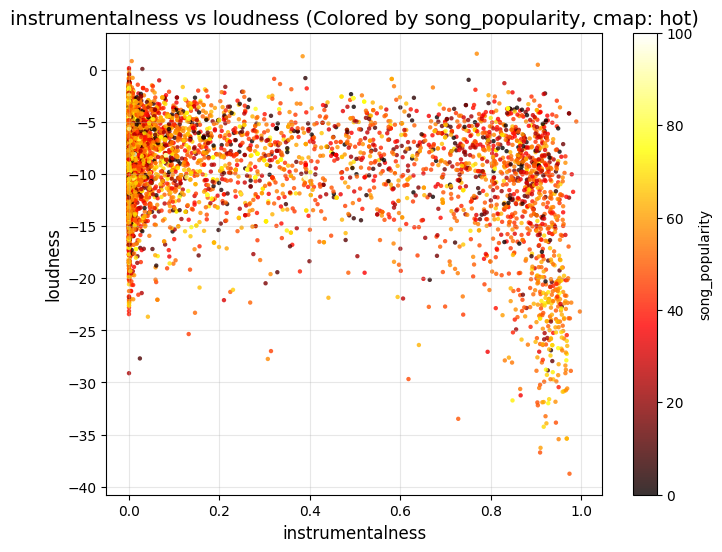

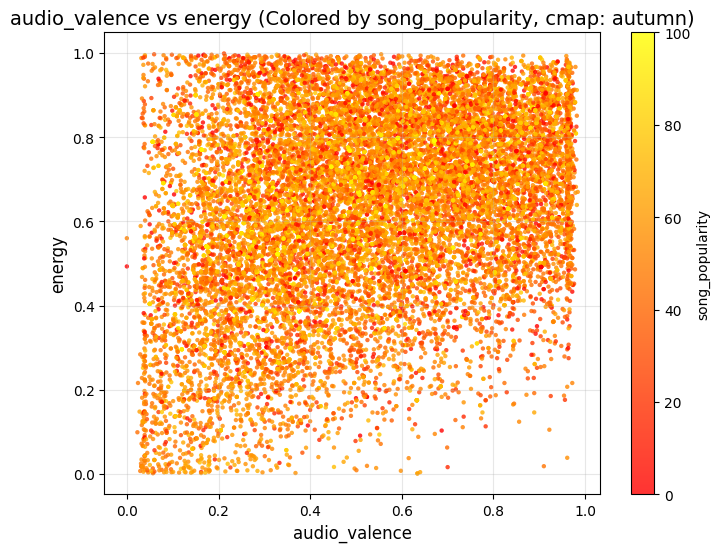

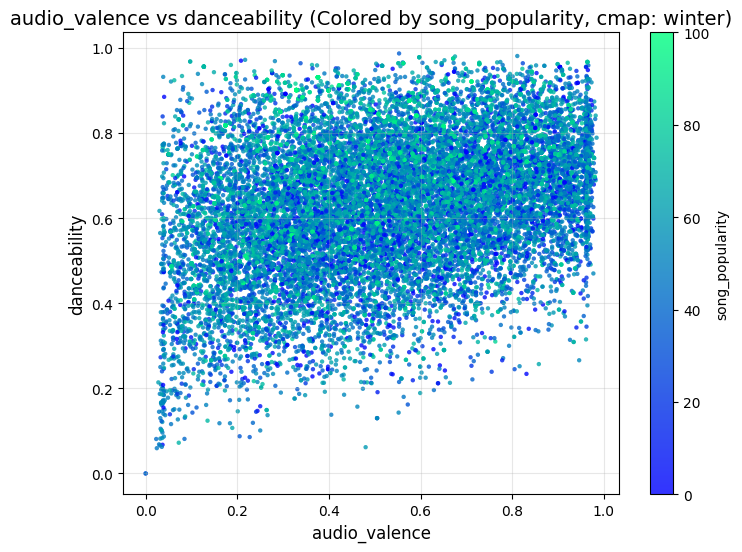

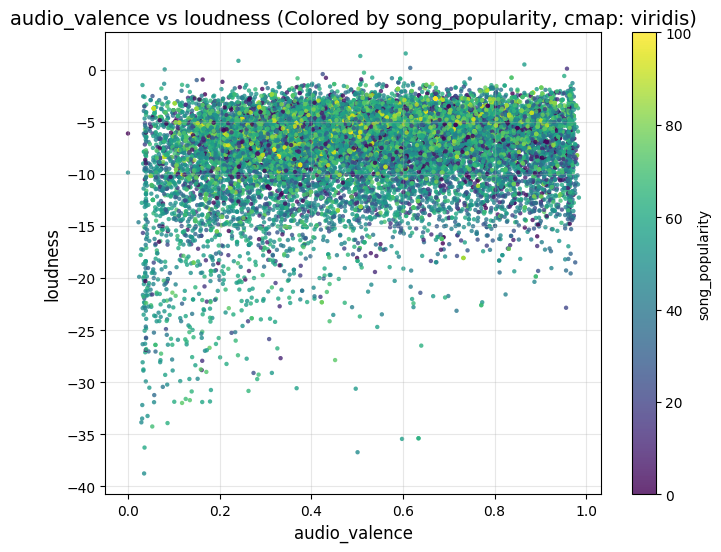

In [ ]:
import matplotlib.pyplot as plt

# Replace 'song_data' with your actual DataFrame containing the variables
# Ensure your DataFrame has the columns used in 'plot_pairs'

# Define variable pairs for scatter plots
plot_pairs = [
    ('energy', 'loudness'),
    ('energy', 'acousticness'),
    ('energy', 'instrumentalness'),
    ('acousticness', 'loudness'),
    ('instrumentalness', 'loudness'),
    ('audio_valence', 'energy'),
    ('audio_valence', 'danceability'),
    ('audio_valence', 'loudness')
]

# # Generate and save each plot
# for i, (x_var, y_var) in enumerate(plot_pairs, start=1):
#     plt.figure(figsize=(8, 6))
#     scatter = plt.scatter(
#         song_data[x_var], song_data[y_var],
#         c=song_data['song_popularity'], cmap='viridis', alpha=0.8, edgecolors='k', s=10
#     )
#     plt.colorbar(scatter, label='song_popularity')
#     plt.title(f'{x_var} vs {y_var} (Colored by song_popularity)', fontsize=14)
#     plt.xlabel(x_var, fontsize=12)
#     plt.ylabel(y_var, fontsize=12)
#     plt.grid(alpha=0.3)
#     plt.savefig(f'scatter_plot_{x_var}_vs_{y_var}.png')  # Save each plot for editing
#     plt.show()

# # Generate and save each plot
# for i, (x_var, y_var) in enumerate(plot_pairs, start=1):
#     plt.figure(figsize=(8, 6))
#     scatter = plt.scatter(
#         song_data[x_var], song_data[y_var],
#         c=song_data['song_popularity'], cmap='viridis', alpha=0.8, edgecolors='none', s=8
#     )
#     plt.colorbar(scatter, label='song_popularity')
#     plt.title(f'{x_var} vs {y_var} (Colored by song_popularity)', fontsize=14)
#     plt.xlabel(x_var, fontsize=12)
#     plt.ylabel(y_var, fontsize=12)
#     plt.grid(alpha=0.3)
#     plt.savefig(f'scatter_plot_{x_var}_vs_{y_var}.png')  # Save each plot for editing
#     plt.show()

# List of colormaps to cycle through
colormaps = ['viridis', 'plasma', 'cividis', 'magma', 'cool', 'hot', 'autumn', 'winter']

# Generate and save each plot
for i, (x_var, y_var) in enumerate(plot_pairs, start=1):
    cmap = colormaps[i % len(colormaps)]  # Cycle through colormaps
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        song_data[x_var], song_data[y_var],
        c=song_data['song_popularity'], cmap=cmap, alpha=0.8, edgecolors='none', s=10
    )
    plt.colorbar(scatter, label='song_popularity')
    plt.title(f'{x_var} vs {y_var} (Colored by song_popularity, cmap: {cmap})', fontsize=14)
    plt.xlabel(x_var, fontsize=12)
    plt.ylabel(y_var, fontsize=12)
    plt.grid(alpha=0.3)
    plt.savefig(f'scatter_plot_{x_var}_vs_{y_var}_cmap_{cmap}.png')  # Save each plot with cmap in the name
    plt.show()

In [ ]:
# # Energy vs Loudness Scatter Plot with Popularity as Size
# plt.figure(figsize=(12, 8))
# bubble = plt.scatter(
#     song_data['energy'], song_data['loudness'],
#     s=song_data['song_popularity'] * 2, c=song_data['tempo'], 
#     cmap='cool', alpha=0.7, edgecolors='k',
# )

# plt.colorbar(bubble, label='Tempo')
# plt.title('Energy vs Loudness (Bubble Size: Popularity, Color: Tempo)', fontsize=16)
# plt.xlabel('Energy', fontsize=14)
# plt.ylabel('Loudness', fontsize=14)
# plt.grid(alpha=0.3)
# plt.show()